In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.style.use('dark_background')
%matplotlib inline
import gensim.downloader
from nltk.tokenize import word_tokenize
import sys
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [6]:
## Mount Google drive folder if running in Colab
if('google.colab' in sys.modules):
    from google.colab import drive
    drive.mount('/content/drive', force_remount = True)
    DIR = '/content/drive/MyDrive/Colab Notebooks/OddSemester2024/AML/Codes'
    DATA_DIR = DIR+'/Data/'
else:
    DATA_DIR = 'Data/'

Mounted at /content/drive


In [30]:
FILE = DATA_DIR + 'Social_Network_Ads.csv'
data = pd.read_csv(FILE)
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [50]:
#split dependent variables
X=data.iloc[:,[2,3]].values
y=data.iloc[:,4].values

In [51]:
#split data into training and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [52]:
#Fitting logistic regression to the training set
from sklearn.linear_model import LogisticRegression
regressor=LogisticRegression(random_state=0)
regressor.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [53]:
#predicting the test set results
y_pred=regressor.predict(X_test)

In [54]:
#making confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[65,  3],
       [ 8, 24]])

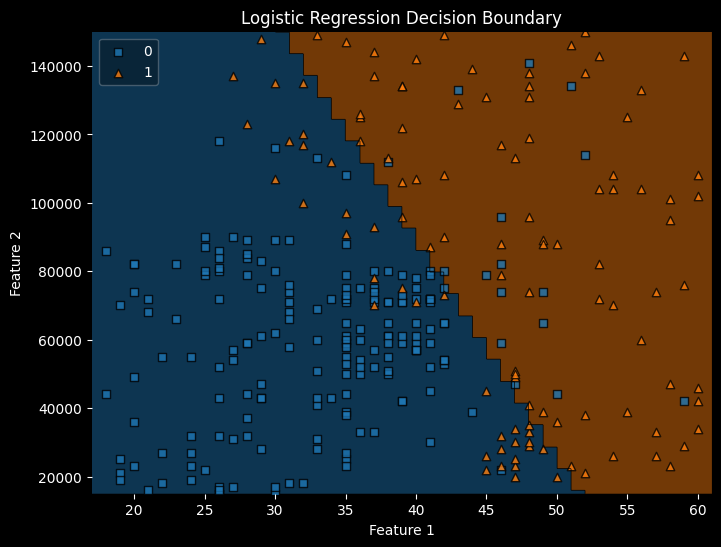

In [61]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

# Plot decision regions
plt.figure(figsize=(8, 6))
plot_decision_regions(X_train, y_train, clf=regressor, legend=2)

# Add labels and title
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


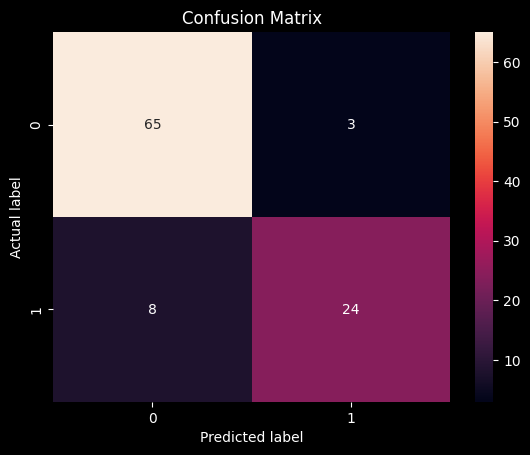

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'cm' is the confusion matrix
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()


In [49]:
from sklearn import metrics #import scikit-learn metrics module for accuracy calculation
#model acuracy, how often is the classifier correct?
prediction = metrics.accuracy_score(y_test,y_pred)
print("Accuracy: ",prediction *100 ,'%')


Accuracy:  89.0 %
